In [1]:
from google.colab import files
uploaded = files.upload()


Saving xgb_best_model.pkl to xgb_best_model.pkl


In [2]:
import joblib
xgb_loaded = joblib.load('xgb_best_model.pkl')


In [7]:
from google.colab import drive
import pandas as pd

# Mount Google Drive
drive.mount('/content/drive')

# Load your dataset (adjust the path as needed)
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/HACKATHON_PREDICTION_DATA.csv")
print(df.columns.tolist())


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
['ACCT_AGE', 'LIMIT', 'OUTS', 'ACCT_RESIDUAL_TENURE', 'LOAN_TENURE', 'INSTALAMT', 'SI_FLG', 'AGE', 'VINTAGE', 'KYC_SCR', 'LOCKER_HLDR_IND', 'UID_FLG', 'KYC_FLG', 'INB_FLG', 'EKYC_FLG', 'ONEMNTHCR', 'ONEMNTHSDR', 'ONEMNTHOUTSTANGBAL', 'ONEMNTHAVGMTD', 'ONEMNTHAVGQTD', 'ONEMNTHAVGYTD', 'TWOMNTHSCR', 'TWOMNTHSDR', 'TWOMNTHOUTSTANGBAL', 'TWOMNTHAVGMTD', 'TWOMNTHAVGQTD', 'TWOMNTHAVGYTD', 'THREEMNTHSCR', 'THREEMNTHSDR', 'THREEMNTHOUTSTANGBAL', 'THREEMNTHAVGMTD', 'THREEMNTHAVGQTD', 'THREEMNTHAVGYTD', 'FOURMNTHSCR', 'FOURMNTHSDR', 'FOURMNTHOUTSTANGBAL', 'FOURMNTHAVGMTD', 'FOURMNTHAVGQTD', 'FOURMNTHAVGYTD', 'FIVEMNTHSCR', 'FIVEMNTHSDR', 'FIVEMNTHOUTSTANGBAL', 'FIVEMNTHAVGMTD', 'FIVEMNTHAVGQTD', 'FIVEMNTHAVGYTD', 'SIXMNTHSCR', 'SIXMNTHSDR', 'SIXMNTHOUTSTANGBAL', 'SIXMNTHAVGMTD', 'SIXMNTHAVGQTD', 'SIXMNTHAVGYTD', 'SEVENMNTHSCR', 'SEVENMNTHSDR', 'SEVENMNTHOUTSTANGBAL', '

In [8]:
df


,ACCT_AGE,LIMIT,OUTS,ACCT_RESIDUAL_TENURE,LOAN_TENURE,INSTALAMT,SI_FLG,AGE,VINTAGE,KYC_SCR,...,AVERAGE_ACCT_AGE1,CREDIT_HISTORY_LENGTH1,NO_OF_INQUIRIES1,INCOME_BAND1,AGREG_GROUP,PRODUCT_TYPE,LATEST_CR_DAYS,LATEST_DR_DAYS,TIME_PERIOD,UNIQUE_ID
0,2.694,729200.0,541543.71,3.308,2192,15247.0,Y,38.915,18.765,110.0,...,1yrs 5mon,4yrs 11mon,2.0,E,#Total Xpress Credit,PERSONAL LOAN,10.0,45715,FEB25,2202
1,5.652,980500.0,426219.82,2.349,2922,15836.0,Y,51.436,15.665,110.0,...,0yrs 11mon,5yrs 6mon,0.0,F,#Total Auto Loan,AUTO LOAN,25.0,45715,FEB25,2209
2,5.737,980500.0,413595.82,2.265,2922,15836.0,Y,51.521,15.750,110.0,...,0yrs 11mon,5yrs 6mon,0.0,F,#Total Auto Loan,AUTO LOAN,28.0,45746,MAR25,2211
3,6.479,735500.0,221620.79,1.607,2953,11996.0,Y,33.526,14.702,198.0,...,1yrs 9mon,6yrs 4mon,0.0,F,#Total Auto Loan,AUTO LOAN,4.0,45746,MAR25,2217
4,6.394,735500.0,231762.79,1.692,2953,11996.0,Y,33.441,14.617,198.0,...,1yrs 9mon,6yrs 4mon,0.0,F,#Total Auto Loan,AUTO LOAN,0.0,45715,FEB25,2218
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
191688,1.561,461500.0,407286.13,4.441,2192,9409.0,N,27.901,11.054,110.0,...,0yrs 11mon,1yrs 11mon,0.0,D,#Total Xpress Credit,PERSONAL LOAN,26.0,45746,MAR25,518266
191689,3.020,495500.0,309105.77,2.982,2192,9165.0,Y,39.862,9.866,110.0,...,0yrs 11mon,2yrs 11mon,0.0,D,#Total Xpress Credit,PERSONAL LOAN,29.0,45746,MAR25,518267
191690,3.097,805500.0,545336.58,2.903,2191,16169.0,Y,42.127,13.100,220.0,...,1yrs 3mon,3yrs 1mon,0.0,G,#Total Xpress Credit,PERSONAL LOAN,7.0,45746,MAR25,518269
191691,2.336,625500.0,459398.55,3.666,2192,11977.0,Y,25.552,9.838,110.0,...,1yrs 3mon,2yrs 4mon,0.0,E,#Total Xpress Credit,PERSONAL LOAN,25.0,45715,FEB25,518270


In [9]:
df.head()

,ACCT_AGE,LIMIT,OUTS,ACCT_RESIDUAL_TENURE,LOAN_TENURE,INSTALAMT,SI_FLG,AGE,VINTAGE,KYC_SCR,...,AVERAGE_ACCT_AGE1,CREDIT_HISTORY_LENGTH1,NO_OF_INQUIRIES1,INCOME_BAND1,AGREG_GROUP,PRODUCT_TYPE,LATEST_CR_DAYS,LATEST_DR_DAYS,TIME_PERIOD,UNIQUE_ID
0,2.694,729200.0,541543.71,3.308,2192,15247.0,Y,38.915,18.765,110.0,...,1yrs 5mon,4yrs 11mon,2.0,E,#Total Xpress Credit,PERSONAL LOAN,10.0,45715,FEB25,2202
1,5.652,980500.0,426219.82,2.349,2922,15836.0,Y,51.436,15.665,110.0,...,0yrs 11mon,5yrs 6mon,0.0,F,#Total Auto Loan,AUTO LOAN,25.0,45715,FEB25,2209
2,5.737,980500.0,413595.82,2.265,2922,15836.0,Y,51.521,15.750,110.0,...,0yrs 11mon,5yrs 6mon,0.0,F,#Total Auto Loan,AUTO LOAN,28.0,45746,MAR25,2211
3,6.479,735500.0,221620.79,1.607,2953,11996.0,Y,33.526,14.702,198.0,...,1yrs 9mon,6yrs 4mon,0.0,F,#Total Auto Loan,AUTO LOAN,4.0,45746,MAR25,2217
4,6.394,735500.0,231762.79,1.692,2953,11996.0,Y,33.441,14.617,198.0,...,1yrs 9mon,6yrs 4mon,0.0,F,#Total Auto Loan,AUTO LOAN,0.0,45715,FEB25,2218


In [11]:
# Nulls overview
print(df.isnull().sum().sort_values(ascending=False).head(20))

# Column types
print(df.dtypes)


LAST_1_YR_RG4            177125
LAST_3_YR_RG4            158948
CUST_NO_OF_TIMES_NPA     134571
LATEST_NPA_TENURE        134571
NO_YRS_NPA               134571
FIRST_NPA_TENURE         134571
NO_ENQ                   122270
CRIFF_22                 101784
CRIFF_66                  44597
CRIFF_55                  44450
EIGHTMNTHAVGMTD           16372
EIGHTMNTHSCR              16372
EIGHTMNTHAVGYTD           16372
EIGHTMNTHOUTSTANGBAL      16372
EIGHTMNTHSDR              16372
EIGHTMNTHAVGQTD           16372
TWELVEMNTHAVGMTD          16310
TWELVEMNTHOUTSTANGBAL     16310
TWELVEMNTHSDR             16310
TWELVEMNTHAVGYTD          16310
dtype: int64
ACCT_AGE                float64
LIMIT                   float64
OUTS                    float64
ACCT_RESIDUAL_TENURE    float64
LOAN_TENURE               int64
                         ...   
PRODUCT_TYPE             object
LATEST_CR_DAYS          float64
LATEST_DR_DAYS            int64
TIME_PERIOD              object
UNIQUE_ID                 i

In [28]:
# Check if 'NO_ENQ' was dropped due to high missingness
if 'NO_ENQ' in cols_to_drop:
    print("'NO_ENQ' was dropped because it had more than 60% missing values.")
else:
    print("'NO_ENQ' was not dropped due to high missingness.")

# Check the missing percentage of 'NO_ENQ'
if 'NO_ENQ' in missing_percent.index:
    print(f"Missing percentage for 'NO_ENQ': {missing_percent['NO_ENQ']:.2f}%")
else:
    print("'NO_ENQ' column not found in the original missing percentage calculation.")

'NO_ENQ' was dropped because it had more than 60% missing values.
Missing percentage for 'NO_ENQ': 0.64%


In [29]:
# 1. Set the missing value threshold
threshold = 0.6  # Drop columns with more than 60% missing values

# 2. Get % of missing values
missing_percent = df.isnull().mean()

# 3. Filter columns to drop, EXCLUDING 'NO_ENQ'
cols_to_drop = missing_percent[(missing_percent > threshold) & (missing_percent.index != 'NO_ENQ')].index.tolist()

# 4. Drop them
df_cleaned = df.drop(columns=cols_to_drop)

print(f"Dropped {len(cols_to_drop)} columns due to high missingness (excluding NO_ENQ).")

Dropped 6 columns due to high missingness (excluding NO_ENQ).


In [30]:
missing_summary = df_cleaned.isnull().sum()
missing_summary = missing_summary[missing_summary > 0].sort_values(ascending=False)
print(missing_summary)


NO_ENQ                    122270
CRIFF_22                  101784
CRIFF_66                   44597
CRIFF_55                   44450
EIGHTMNTHOUTSTANGBAL       16372
                           ...  
TOT_IRAC_CHNG                  3
TIMES_IRAC_UPR                 3
ACCT_RESIDUAL_TENURE           2
LATEST_RESIDUAL_TENURE         2
OLDEST_RESIDUAL_TENURE         2
Length: 107, dtype: int64


In [31]:
# Step 2B: Imputation

# Separate columns by type
num_cols = df_cleaned.select_dtypes(include=['float64', 'int64']).columns
cat_cols = df_cleaned.select_dtypes(include='object').columns

# Impute numerical columns with median
for col in num_cols:
    if df_cleaned[col].isnull().sum() > 0:
        median_value = df_cleaned[col].median()
        df_cleaned[col].fillna(median_value, inplace=True)

# Impute categorical columns with mode
for col in cat_cols:
    if df_cleaned[col].isnull().sum() > 0:
        mode_value = df_cleaned[col].mode()[0]
        df_cleaned[col].fillna(mode_value, inplace=True)


/tmp/ipython-input-2780280750.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_cleaned[col].fillna(median_value, inplace=True)
/tmp/ipython-input-2780280750.py:17: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', tr

In [32]:
# Make sure no missing values remain
print("Remaining missing values:", df_cleaned.isnull().sum().sum())  # Should be 0


Remaining missing values: 0


In [33]:
# Standardize the format (e.g., "NOV24" -> "2024-11")
import datetime

def convert_time_period(x):
    try:
        return datetime.datetime.strptime(x, "%b%y")
    except:
        return pd.NaT

df_cleaned['TIME_PERIOD_DT'] = df_cleaned['TIME_PERIOD'].apply(convert_time_period)
df_cleaned['MONTH'] = df_cleaned['TIME_PERIOD_DT'].dt.month
df_cleaned['YEAR'] = df_cleaned['TIME_PERIOD_DT'].dt.year


In [34]:
# Add new columns
df_cleaned['UTILIZATION_RATIO'] = df_cleaned['OUTS'] / df_cleaned['LIMIT']
df_cleaned['INSTALAMT_TO_LIMIT'] = df_cleaned['INSTALAMT'] / df_cleaned['LIMIT']
df_cleaned['RESIDUAL_RATIO'] = df_cleaned['ACCT_RESIDUAL_TENURE'] / df_cleaned['LOAN_TENURE']


In [35]:
# Convert all "Y"/"N" flag columns
flag_cols = [col for col in df_cleaned.columns if df_cleaned[col].nunique() == 2 and
             set(df_cleaned[col].dropna().unique()).issubset({'Y', 'N'})]

for col in flag_cols:
    df_cleaned[col] = df_cleaned[col].map({'Y': 1, 'N': 0})


In [36]:
import re

def parse_credit_history(val):
    if isinstance(val, str):
        match = re.match(r"(\d+)yrs\s*(\d+)?mon?", val)
        if match:
            years = int(match.group(1))
            months = int(match.group(2)) if match.group(2) else 0
            return years * 12 + months
    return np.nan

df_cleaned['CREDIT_HISTORY_MONTHS'] = df_cleaned['CREDIT_HISTORY_LENGTH1'].apply(parse_credit_history)


In [37]:
from sklearn.preprocessing import LabelEncoder

# Label encode binary categorical columns
binary_cols = ['SI_FLG', 'INB_FLG', 'UID_FLG', 'EKYC_FLG']
le = LabelEncoder()
for col in binary_cols:
    df_cleaned[col] = le.fit_transform(df_cleaned[col].astype(str))

# One-hot encode multi-class categorical columns
multi_cat_cols = ['PRODUCT_TYPE', 'AGREG_GROUP']
df_cleaned = pd.get_dummies(df_cleaned, columns=multi_cat_cols, drop_first=True)


In [38]:
# Step 4b: Encode categorical columns properly
from sklearn.preprocessing import LabelEncoder

# 🔍 Identify object-type (string) columns
cat_cols = df_cleaned.select_dtypes(include=['object']).columns.tolist()
print("Categorical columns to encode:", cat_cols)

# ✅ NEW: Encode each categorical column using LabelEncoder
le = LabelEncoder()
for col in cat_cols:
    df_cleaned[col] = le.fit_transform(df_cleaned[col].astype(str))

print("Encoding complete.")


Categorical columns to encode: ['KYC_FLG', 'AVERAGE_ACCT_AGE1', 'CREDIT_HISTORY_LENGTH1', 'INCOME_BAND1', 'TIME_PERIOD']
Encoding complete.


In [39]:
# Drop irrelevant columns (ones not used during training)
X_test = df_cleaned.drop(columns=['UNIQUE_ID', 'TIME_PERIOD', 'TIME_PERIOD_DT'], errors='ignore')

# Drop any remaining non-numeric columns
non_numeric_cols_test = X_test.select_dtypes(exclude=['number']).columns
if len(non_numeric_cols_test) > 0:
    print(f"Dropping non-numeric columns from test data: {list(non_numeric_cols_test)}")
    X_test = X_test.drop(columns=non_numeric_cols_test)


Dropping non-numeric columns from test data: ['PRODUCT_TYPE_EDUCATION LOAN', 'PRODUCT_TYPE_HOME LOAN', 'PRODUCT_TYPE_PERSONAL LOAN', 'AGREG_GROUP_#Housing Loan', 'AGREG_GROUP_#Total Auto Loan', 'AGREG_GROUP_#Total Xpress Credit']


In [40]:
# Step 1: Predict probabilities (or class labels directly)
# If binary classification and you want hard predictions:
test_preds = xgb_loaded.predict(X_test)


In [41]:
test_preds

array([0, 0, 0, ..., 0, 1, 0])

Class 0: 158497 predictions
Class 1: 33196 predictions


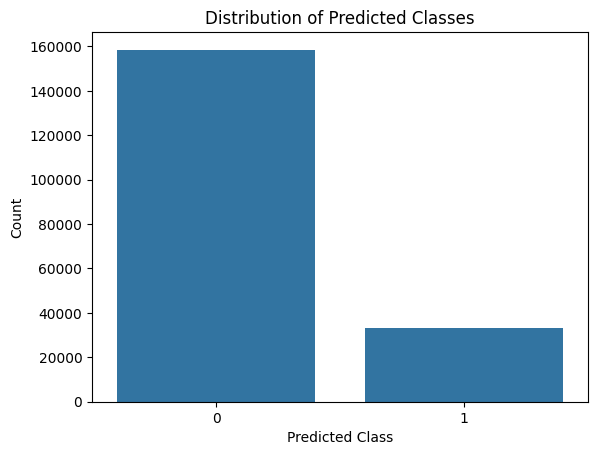

In [42]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

unique, counts = np.unique(test_preds, return_counts=True)
for u, c in zip(unique, counts):
    print(f"Class {u}: {c} predictions")

# Visualize
sns.countplot(x=test_preds)
plt.title("Distribution of Predicted Classes")
plt.xlabel("Predicted Class")
plt.ylabel("Count")
plt.show()


In [43]:
test_preds.shape


(191693,)

In [44]:
df.shape

(191693, 138)

In [45]:
# If test_preds is a NumPy array
import numpy as np
import pandas as pd

# Ensure length matches
assert len(test_preds) == len(df), "Length mismatch between predictions and dataframe"

# Add prediction column
df['prediction'] = test_preds


In [46]:
df.shape

(191693, 139)

In [47]:
# Save to CSV in current Colab session
df.to_csv("predicted_test_data.csv", index=False)

# Optional: also save to Google Drive
df.to_csv("/content/drive/MyDrive/Colab Notebooks/predicted_test_data.csv", index=False)


In [48]:
from google.colab import files
files.download("predicted_test_data.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>